# Earthquake EDA Notebook

Exploratory Data Analysis on the `all_week.csv` earthquake dataset.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")


In [ ]:
# Load dataset
df = pd.read_csv("all_week.csv")
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2025-04-05T14:59:10.757Z,31.766000,-104.135000,4.870500,2.20,ml,17.0,151.0,0.00000,0.20,...,2025-04-05T15:08:51.422Z,"50 km SSE of Whites City, New Mexico",earthquake,0.00,1.386261,0.100,13.0,automatic,tx,tx
1,2025-04-05T14:55:53.280Z,38.832668,-122.814667,1.670000,0.76,md,12.0,55.0,0.00993,0.01,...,2025-04-05T15:17:17.947Z,"8 km NNW of The Geysers, CA",earthquake,0.33,0.820000,0.170,14.0,automatic,nc,nc
2,2025-04-05T14:44:12.180Z,33.784333,-116.084833,1.530000,0.95,ml,32.0,56.0,0.11450,0.20,...,2025-04-05T14:48:05.254Z,"14 km ENE of Indio, CA",earthquake,0.21,0.370000,0.169,24.0,automatic,ci,ci
3,2025-04-05T14:41:52.330Z,41.118832,-123.347832,42.299999,2.44,md,7.0,134.0,0.19480,0.01,...,2025-04-05T14:47:19.746Z,"31 km S of Somes Bar, CA",earthquake,0.69,2.530000,0.270,3.0,automatic,nc,nc
4,2025-04-05T14:39:01.890Z,62.207700,-151.152700,82.700000,1.90,ml,NaN,NaN,NaN,0.58,...,2025-04-05T14:41:03.553Z,"27 km NNE of Skwentna, Alaska",earthquake,NaN,0.600000,NaN,NaN,automatic,ak,ak


In [ ]:
# Check null values
df.isnull().sum()

time                 0
latitude             0
longitude            0
depth                0
mag                  0
magType              0
nst                391
gap                391
dmin               393
rms                  0
net                  0
id                   0
updated              0
place                0
type                 0
horizontalError    546
depthError           0
magError           398
magNst             393
status               0
locationSource       0
magSource            0
dtype: int64

In [ ]:
# Drop rows with any nulls (optional, depending on your analysis)
clean_data = df.dropna()
clean_data.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2025-04-05T14:59:10.757Z,31.766000,-104.135000,4.870500,2.20,ml,17.0,151.0,0.00000,0.20,...,2025-04-05T15:08:51.422Z,"50 km SSE of Whites City, New Mexico",earthquake,0.00,1.386261,0.100,13.0,automatic,tx,tx
1,2025-04-05T14:55:53.280Z,38.832668,-122.814667,1.670000,0.76,md,12.0,55.0,0.00993,0.01,...,2025-04-05T15:17:17.947Z,"8 km NNW of The Geysers, CA",earthquake,0.33,0.820000,0.170,14.0,automatic,nc,nc
2,2025-04-05T14:44:12.180Z,33.784333,-116.084833,1.530000,0.95,ml,32.0,56.0,0.11450,0.20,...,2025-04-05T14:48:05.254Z,"14 km ENE of Indio, CA",earthquake,0.21,0.370000,0.169,24.0,automatic,ci,ci
3,2025-04-05T14:41:52.330Z,41.118832,-123.347832,42.299999,2.44,md,7.0,134.0,0.19480,0.01,...,2025-04-05T14:47:19.746Z,"31 km S of Somes Bar, CA",earthquake,0.69,2.530000,0.270,3.0,automatic,nc,nc
6,2025-04-05T14:27:03.030Z,33.947500,-116.317667,8.710000,0.84,ml,33.0,47.0,0.07603,0.17,...,2025-04-05T14:31:24.210Z,"16 km NNE of Thousand Palms, CA",earthquake,0.20,0.570000,0.121,20.0,automatic,ci,ci


In [ ]:
clean_data.isnull().sum()

time               0
latitude           0
longitude          0
depth              0
mag                0
magType            0
nst                0
gap                0
dmin               0
rms                0
net                0
id                 0
updated            0
place              0
type               0
horizontalError    0
depthError         0
magError           0
magNst             0
status             0
locationSource     0
magSource          0
dtype: int64

In [ ]:
# Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2151 entries, 0 to 2150
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             2151 non-null   object 
 1   latitude         2151 non-null   float64
 2   longitude        2151 non-null   float64
 3   depth            2151 non-null   float64
 4   mag              2151 non-null   float64
 5   magType          2151 non-null   object 
 6   nst              1760 non-null   float64
 7   gap              1760 non-null   float64
 8   dmin             1758 non-null   float64
 9   rms              2151 non-null   float64
 10  net              2151 non-null   object 
 11  id               2151 non-null   object 
 12  updated          2151 non-null   object 
 13  place            2151 non-null   object 
 14  type             2151 non-null   object 
 15  horizontalError  1605 non-null   float64
 16  depthError       2151 non-null   float64
 17  magError      

In [ ]:
# Summary statistics
df.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,2151.000000,2151.000000,2151.000000,2151.000000,1760.000000,1760.000000,1758.000000,2151.000000,1605.000000,2151.000000,1753.000000,1758.000000
mean,41.083333,-112.230250,19.878443,1.455334,20.777273,118.056619,0.499720,0.269152,1.668026,2.257476,0.175384,17.894198
std,18.186187,67.226897,53.906522,1.295900,21.018964,62.613911,2.000123,0.284558,3.109397,5.336063,0.107416,31.425897
min,-65.070900,-179.996200,-3.170000,-1.220000,3.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.158750,-150.359950,2.965000,0.670000,8.000000,69.000000,0.013000,0.090000,0.300000,0.500000,0.100000,6.000000
50%,38.842335,-122.193167,6.920200,1.260000,14.000000,106.500000,0.048825,0.170000,0.520000,0.850000,0.160000,10.000000
75%,56.261900,-111.858500,12.155000,1.820000,25.000000,151.000000,0.117775,0.339400,1.020000,1.700000,0.219679,19.000000
max,79.842700,179.708000,604.514000,7.000000,204.000000,333.020000,33.979000,3.830000,41.390000,90.200000,1.270000,624.000000


In [ ]:
# Check for duplicates
df.duplicated().sum()

np.int64(0)

In [ ]:
# Convert 'time' to datetime
df["time"] = pd.to_datetime(df["time"])

In [ ]:
# Sample data
df.sample(5)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
1463,2025-03-31 23:16:08.510000+00:00,47.553167,-113.478333,12.82,1.81,ml,30.0,93.0,0.303300,0.18,...,2025-03-31T23:53:40.670Z,"17 km E of Condon, Montana",earthquake,0.40,0.68,0.301707,16.0,reviewed,mb,mb
675,2025-04-03 06:23:00+00:00,32.823167,-115.461500,9.47,1.82,ml,30.0,50.0,0.021680,0.29,...,2025-04-03T18:33:21.834Z,"8 km W of Holtville, CA",earthquake,0.44,0.70,0.174000,17.0,reviewed,ci,ci
2141,2025-03-29 16:08:14.290000+00:00,38.815834,-122.828003,2.16,0.44,md,8.0,88.0,0.007016,0.02,...,2025-03-29T16:09:52.385Z,"8 km NW of The Geysers, CA",earthquake,0.63,0.95,0.280000,7.0,automatic,nc,nc
2133,2025-03-29 16:30:12.701000+00:00,61.633800,-150.708100,49.40,1.40,ml,NaN,NaN,NaN,0.23,...,2025-03-29T16:32:48.993Z,"14 km NW of Susitna, Alaska",earthquake,NaN,2.20,NaN,NaN,automatic,ak,ak
1974,2025-03-30 06:24:31.910000+00:00,33.180000,-116.380000,12.83,0.96,ml,46.0,33.0,0.093310,0.19,...,2025-03-31T17:39:36.587Z,"8 km S of Borrego Springs, CA",earthquake,0.22,0.55,0.192000,20.0,reviewed,ci,ci


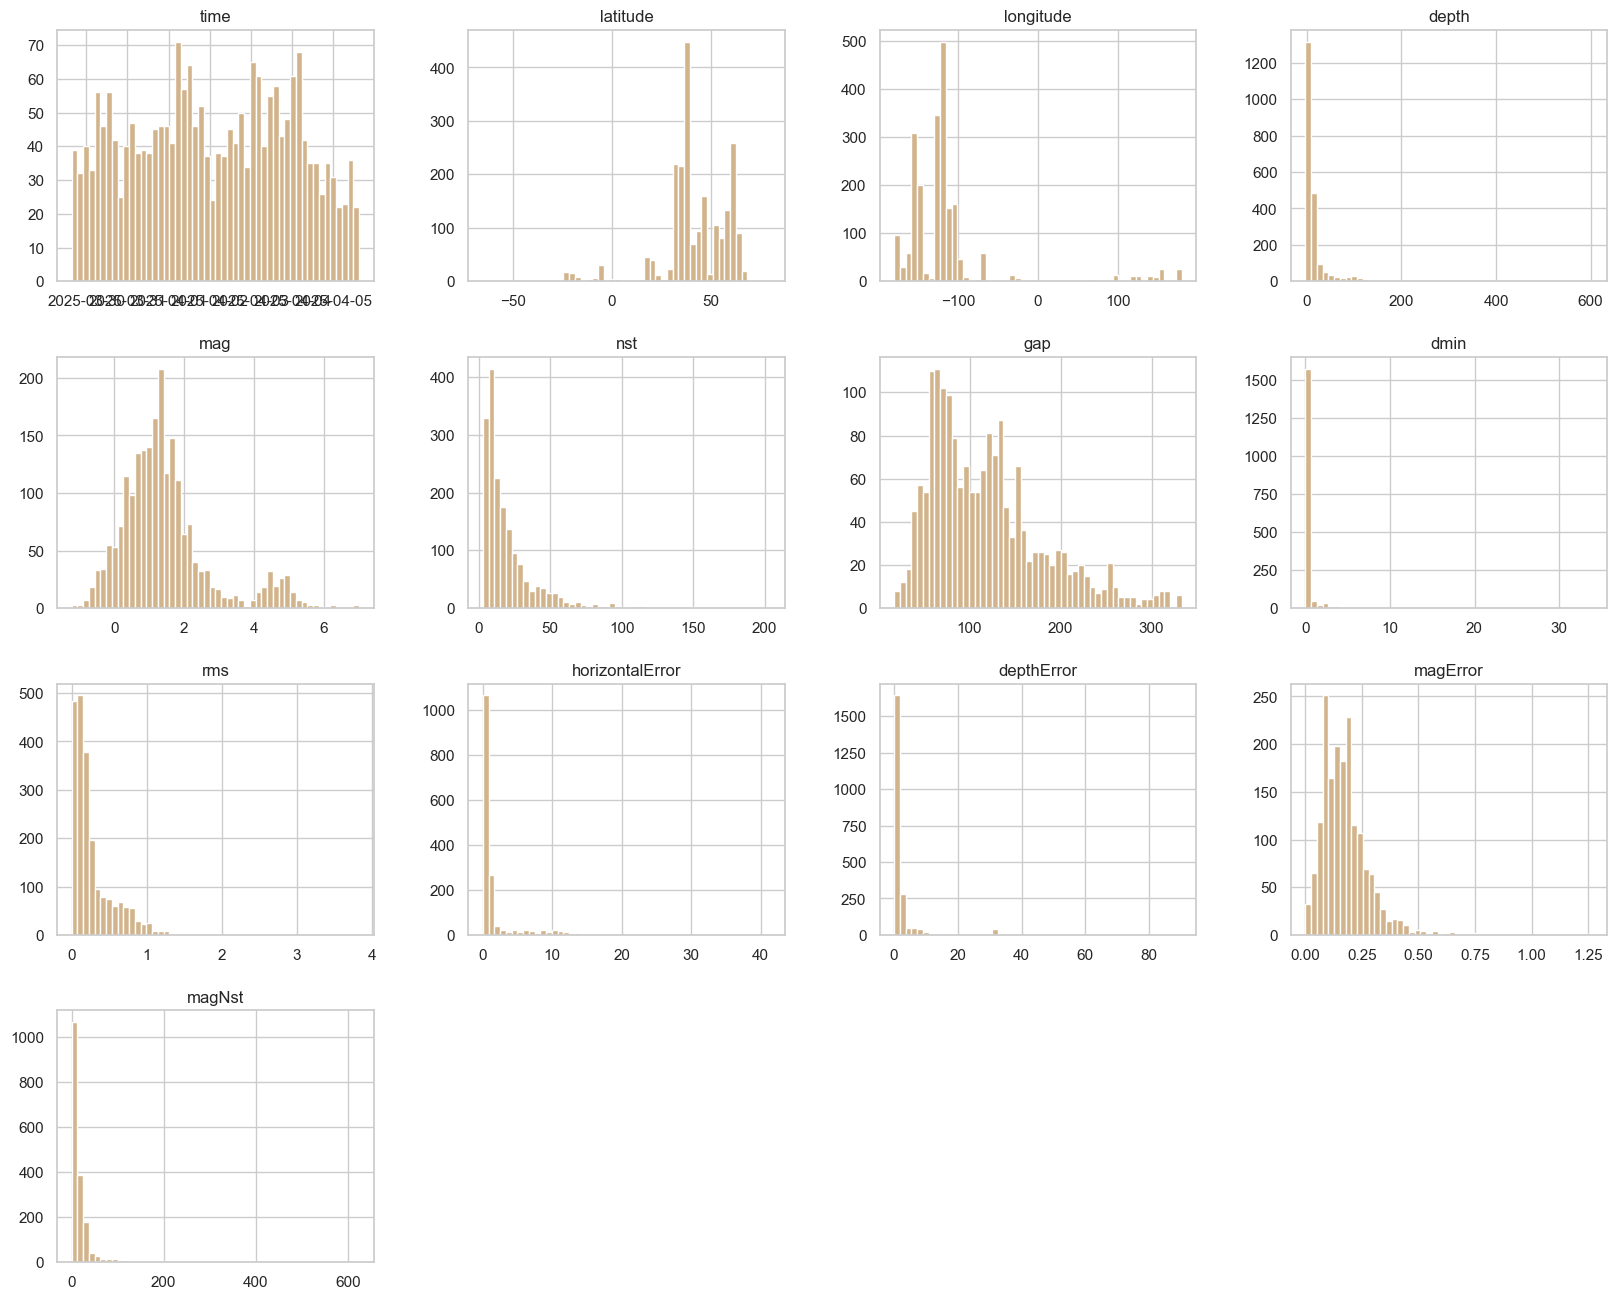

In [ ]:
# Histogram for all numeric columns
df.hist(bins=50, figsize=(20,16), color='tan')
plt.show()

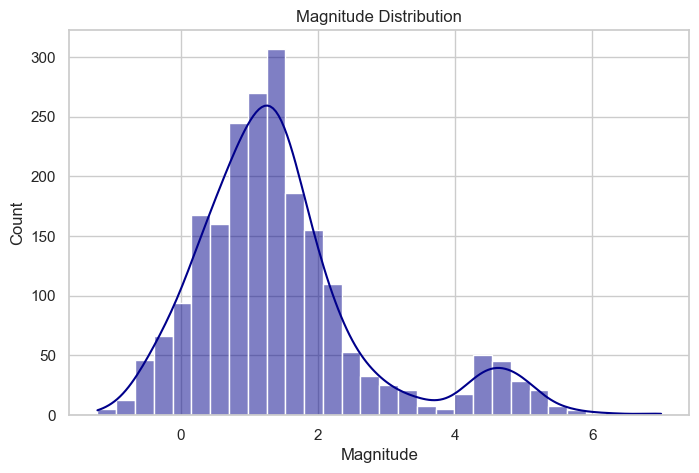

In [ ]:
# Magnitude distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["mag"], bins=30, kde=True, color="darkblue")
plt.title("Magnitude Distribution")
plt.xlabel("Magnitude")
plt.ylabel("Count")
plt.show()

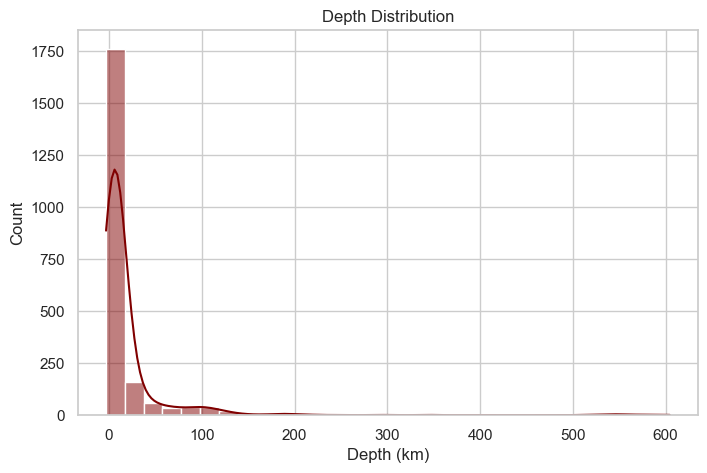

In [ ]:
# Depth distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["depth"], bins=30, kde=True, color="maroon")
plt.title("Depth Distribution")
plt.xlabel("Depth (km)")
plt.ylabel("Count")
plt.show()

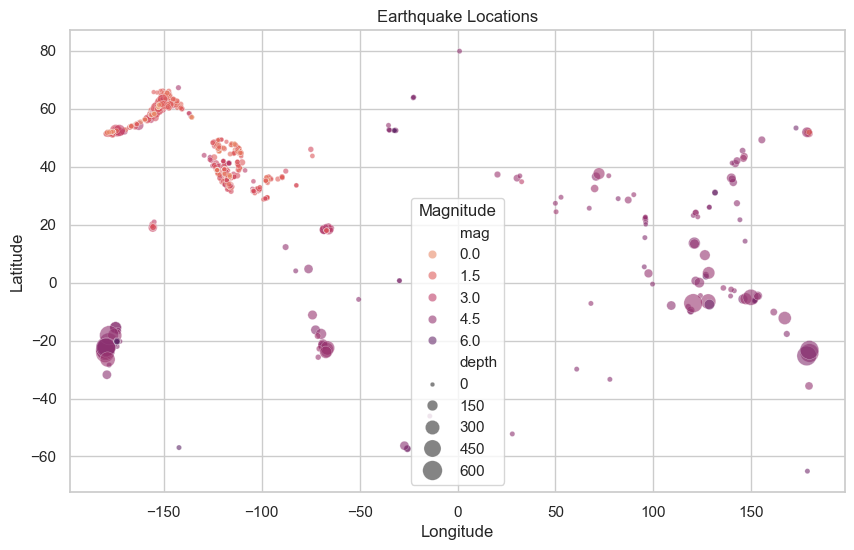

In [ ]:
# Earthquake locations
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="longitude", y="latitude", hue="mag", size="depth", palette="flare", sizes=(10, 200), alpha=0.6)
plt.title("Earthquake Locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Magnitude")
plt.show()

C:\Users\Shiwani Agrawal\AppData\Local\Temp\ipykernel_13244\722129903.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_regions.values, y=top_10_regions.index, palette="magma",legend=False)


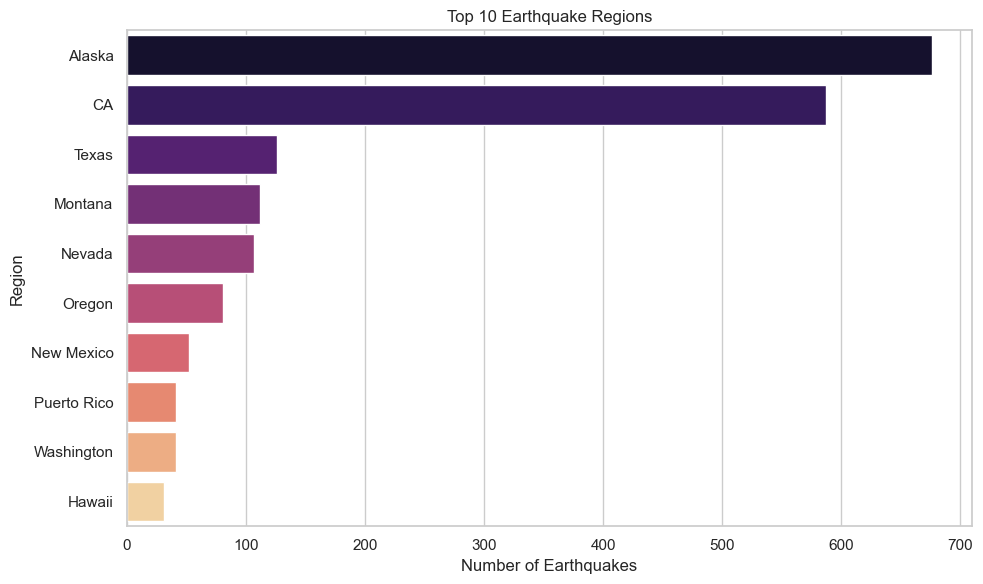

In [ ]:
# Extract region from place and plot top 10
df["region"] = df["place"].apply(lambda x: x.split(",")[-1].strip() if "," in x else x)
top_10_regions = df["region"].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_regions.values, y=top_10_regions.index, palette="magma",legend=False)
plt.title("Top 10 Earthquake Regions")
plt.xlabel("Number of Earthquakes")
plt.ylabel("Region")
plt.tight_layout()
plt.show()

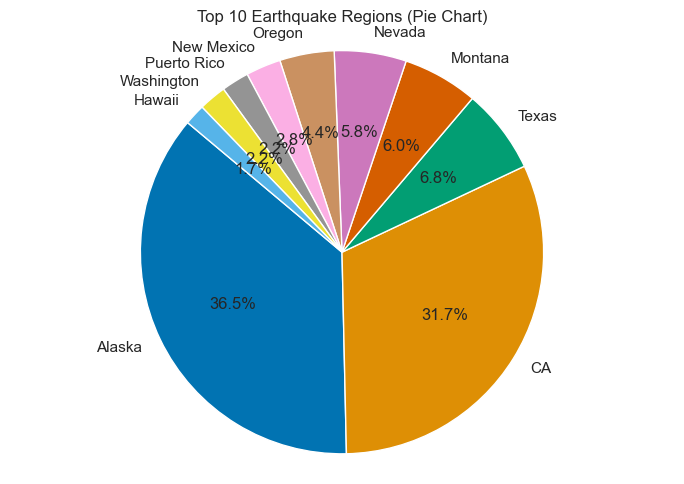

In [ ]:
top_10_regions = df["region"].value_counts().head(10)

plt.figure(figsize=(7, 5))
plt.pie(top_10_regions.values, labels=top_10_regions.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("colorblind"))
plt.title("Top 10 Earthquake Regions (Pie Chart)")
plt.axis('equal')  
plt.tight_layout()
plt.show()

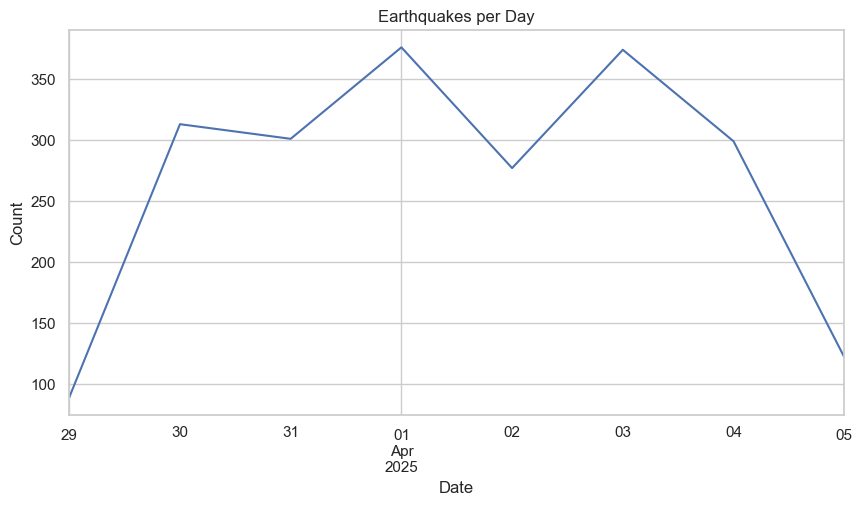

In [ ]:
# Time-series analysis
df.set_index("time", inplace=True)
df["mag"].resample("D").count().plot(figsize=(10, 5), title="Earthquakes per Day")
plt.xlabel("Date")
plt.ylabel("Count")
plt.show()

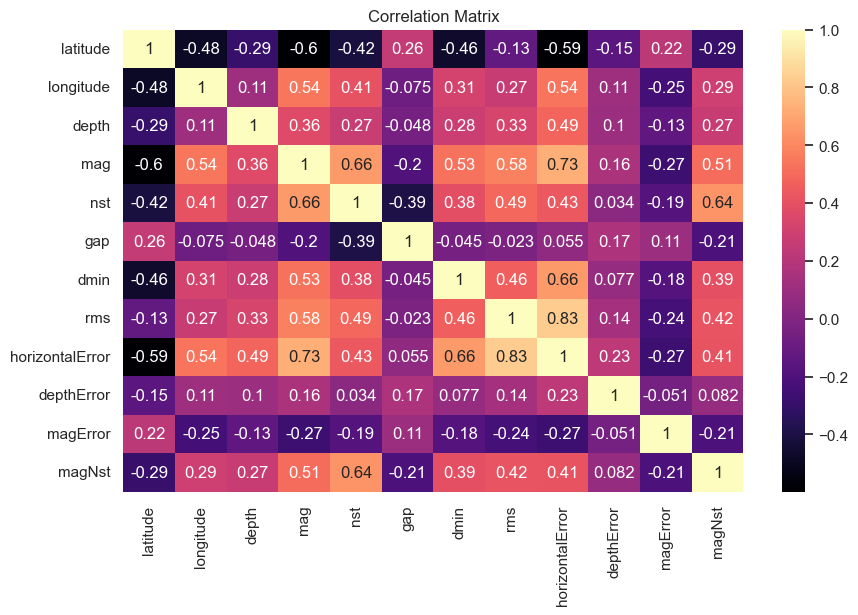

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="magma")
plt.title("Correlation Matrix")
plt.show()

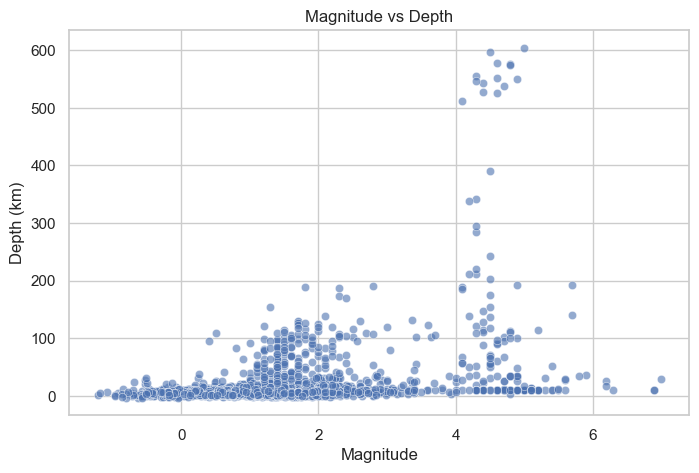

In [ ]:
# Magnitude vs Depth
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="mag", y="depth", alpha=0.6)
plt.title("Magnitude vs Depth")
plt.xlabel("Magnitude")
plt.ylabel("Depth (km)")
plt.show()

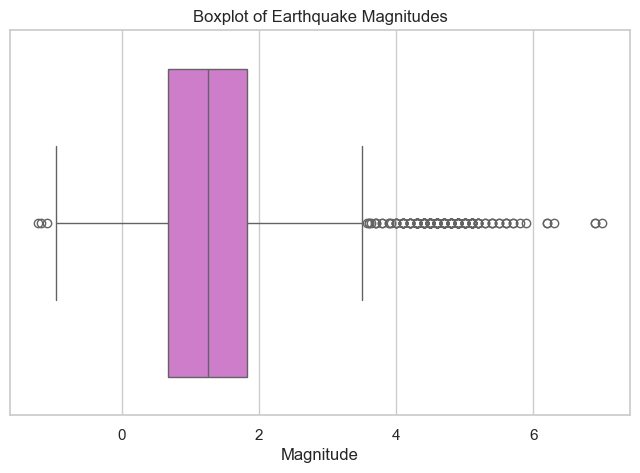

In [ ]:
# Boxplot to detect magnitude outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["mag"], color="orchid")
plt.title("Boxplot of Earthquake Magnitudes")
plt.xlabel("Magnitude")
plt.show()

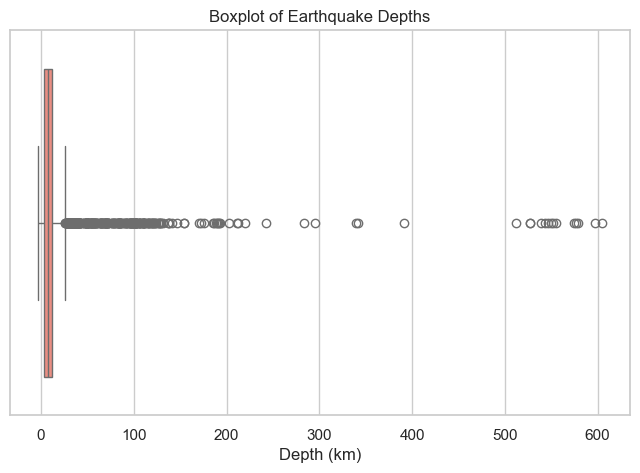

In [ ]:
# Boxplot to detect depth outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["depth"], color="salmon")
plt.title("Boxplot of Earthquake Depths")
plt.xlabel("Depth (km)")
plt.show()

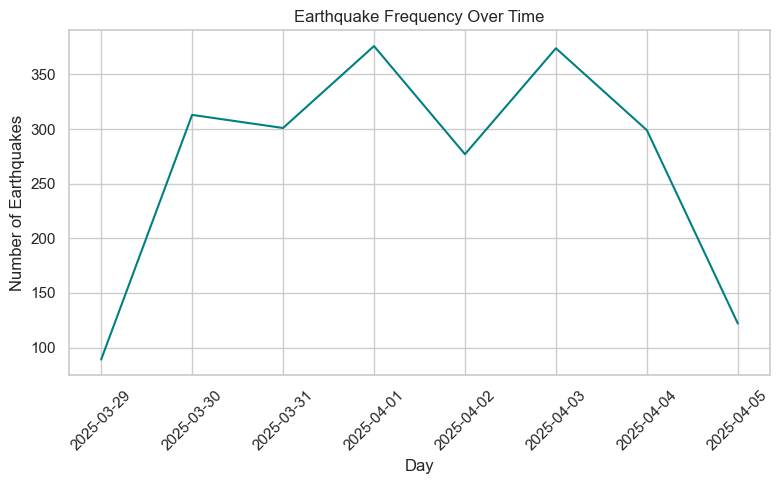

In [ ]:
#Earthquake frequency over time
df_reset = df.reset_index()
df_reset['day'] = df_reset['time'].dt.date
daily_quakes = df_reset.groupby("day").size().reset_index(name='count')

plt.figure(figsize=(8,5))
sns.lineplot(data=daily_quakes, x="day", y="count", color="teal")
plt.title("Earthquake Frequency Over Time")
plt.xlabel("Day")
plt.ylabel("Number of Earthquakes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


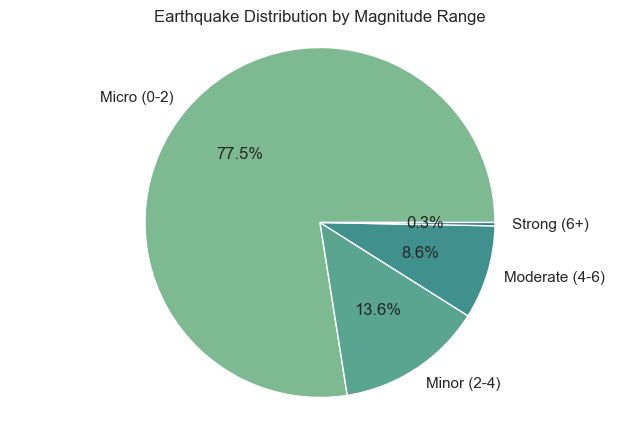

In [ ]:
#Earthquake Distribution by magnitude Range 
bins = [0, 2, 4, 6, 10]
labels = ['Micro (0-2)', 'Minor (2-4)', 'Moderate (4-6)', 'Strong (6+)']
df['mag_range'] = pd.cut(df['mag'], bins=bins, labels=labels, include_lowest=True)

mag_dist = df['mag_range'].value_counts().sort_index()

plt.figure(figsize=(8,5))
plt.pie(mag_dist.values, labels=mag_dist.index, autopct='%1.1f%%', colors=sns.color_palette("crest"))
plt.title("Earthquake Distribution by Magnitude Range")
plt.axis('equal')
plt.show()


C:\Users\Shiwani Agrawal\AppData\Local\Temp\ipykernel_13244\1546925897.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="mag_range", y="depth", palette="dark")


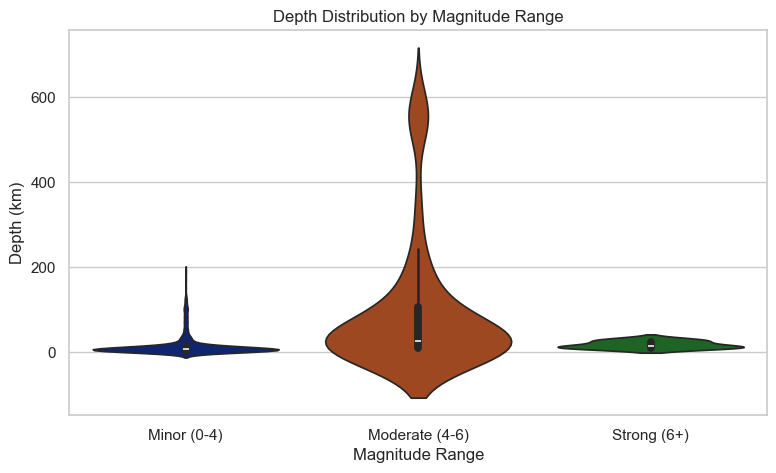

In [ ]:
#Depth distribution by magnitude range
bins = [0, 4, 6, 10]
labels = ['Minor (0-4)', 'Moderate (4-6)', 'Strong (6+)']
df['mag_range'] = pd.cut(df['mag'], bins=bins, labels=labels, include_lowest=True)

# Plot violin
plt.figure(figsize=(9,5))
sns.violinplot(data=df, x="mag_range", y="depth", palette="dark")
plt.title("Depth Distribution by Magnitude Range")
plt.xlabel("Magnitude Range")
plt.ylabel("Depth (km)")
plt.show()


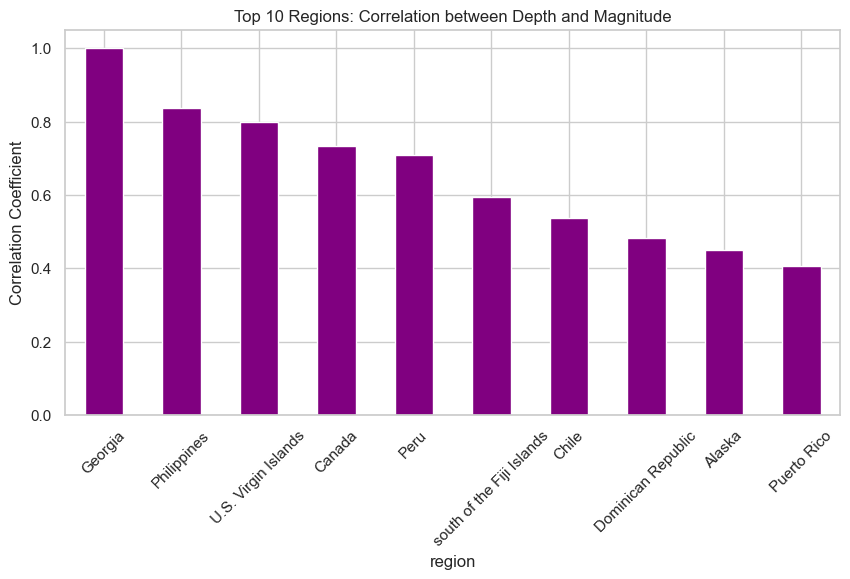

In [ ]:
# Group by region and get correlation
corrs = df.groupby('region')[['depth', 'mag']].corr().unstack().iloc[:,1].sort_values(ascending=False)

# Bar plot of correlations per region
plt.figure(figsize=(10, 5))
corrs.head(10).plot(kind='bar', color='purple')
plt.title("Top 10 Regions: Correlation between Depth and Magnitude")
plt.ylabel("Correlation Coefficient")
plt.xticks(rotation=45)
plt.show()


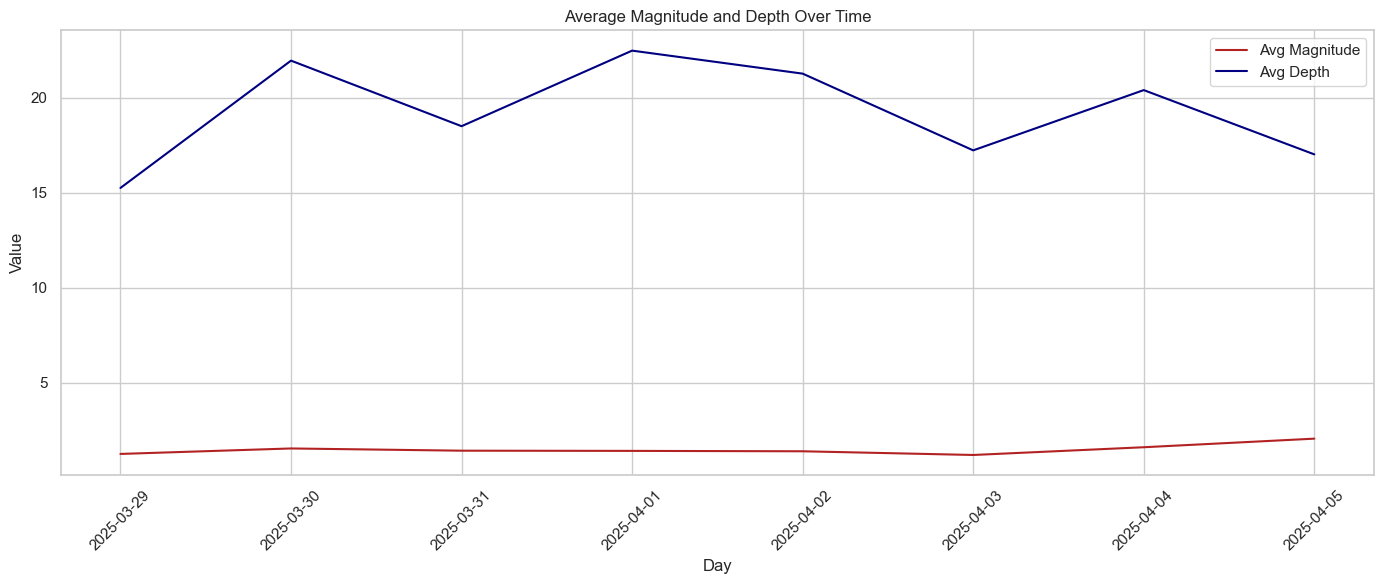

In [ ]:
# Group by region and get correlation
# Prepare daily averages
df_reset = df.reset_index()
df_reset['day'] = df_reset['time'].dt.date

daily_avg = df_reset.groupby('day')[['depth', 'mag']].mean().reset_index()

# Plot both lines
plt.figure(figsize=(14, 6))
sns.lineplot(data=daily_avg, x='day', y='mag', label='Avg Magnitude', color='firebrick')
sns.lineplot(data=daily_avg, x='day', y='depth', label='Avg Depth', color='navy')
plt.title("Average Magnitude and Depth Over Time")
plt.xlabel("Day")
plt.ylabel("Value")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



C:\Users\Shiwani Agrawal\AppData\Local\Temp\ipykernel_13244\1504066830.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=top_df, x="region", y="mag", palette="tab20")


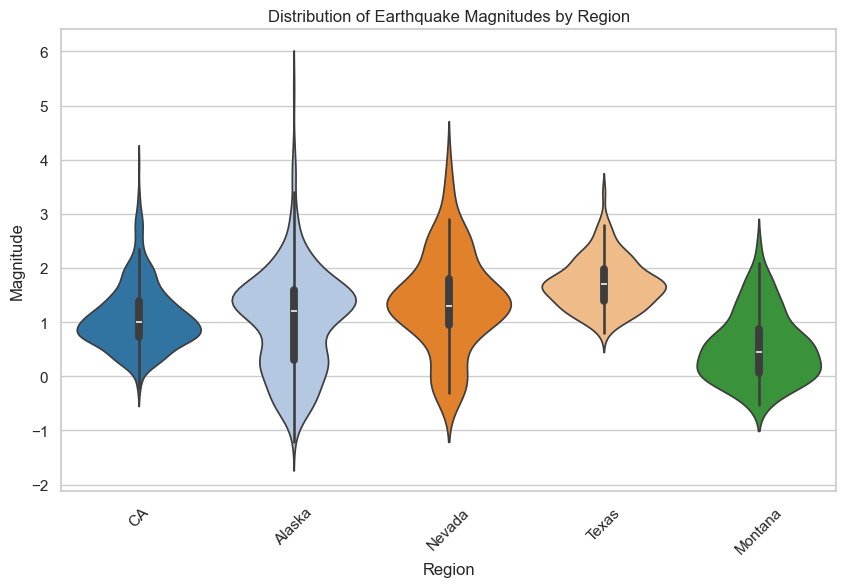

In [ ]:
# Select top 5 regions
top_regions = df['region'].value_counts().head(5).index
top_df = df[df['region'].isin(top_regions)]

# Plot violin
plt.figure(figsize=(10, 6))
sns.violinplot(data=top_df, x="region", y="mag", palette="tab20")
plt.title("Distribution of Earthquake Magnitudes by Region")
plt.xlabel("Region")
plt.ylabel("Magnitude")
plt.xticks(rotation=45)
plt.show()
